<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://huggingface.co/datasets/TwinkStart/Nsynth

In [1]:
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras tensorflow scikeras scikit-learn

# Load dataset

In [3]:
from google.colab import userdata
projPath  = userdata.get('driveProjDir') #replace this with your csv path

In [4]:
features_label = pd.read_csv(f"/content/drive/MyDrive/{projPath}/features_label.csv")
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


In [5]:
class_list = ['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal'
]

# Deeplearning model


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features_label.iloc[:, :-1], features_label.iloc[:,-1], test_size=0.2, random_state=3213123)

In [8]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
# covert back into (number of train/test), height, width, channels(greyscale) for CNN
x_train_reshaped = x_train.values.reshape(-1, 128, 94, 1)
x_test_reshaped = x_test.values.reshape(-1, 128, 94, 1)

In [10]:
np.shape(x_train_reshaped)

(3276, 128, 94, 1)

In [58]:
num_labels = len(class_list)
# one hot encoding using to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_labels)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_labels)

In [59]:
# shape of each row
input_shape = x_train_reshaped.shape[1:]

In [116]:
model = models.Sequential([
    # Input layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [117]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 126, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 63, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,387,850 (9.11 MB)

 Trainable params: 2,387,850 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
checkpoint = ModelCheckpoint(
    filepath="weights-{epoch:02d}-loss{loss:.2f}-acc{accuracy:.2f}.keras",
    monitor="val_accuracy",
    save_best_only=True,       # Save only the best model
    mode="max",
)

early_stopping = EarlyStopping(
    monitor="val_loss",            # Monitor the loss on training data
    patience=5,
    mode="min",
    verbose=1
)


In [119]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
import random
np.random.seed(875)
random.seed(443)
tf.random.set_seed(3213)

In [121]:
gpu = tf.config.list_physical_devices('GPU')
if gpu:
  try:
    with tf.device('/device:GPU:0'):
      print("Training on GPU")
      history = model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32,callbacks=[checkpoint],validation_split=0.2)
  except RuntimeError as e:
    print(e)
else:
  print("Training on CPU")
  history = model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32,callbacks=[checkpoint],validation_split=0.2)

Training on GPU
Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.1761 - loss: 7.5716 - val_accuracy: 0.3750 - val_loss: 1.8720
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3241 - loss: 1.8884 - val_accuracy: 0.4055 - val_loss: 1.6941
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3816 - loss: 1.7643 - val_accuracy: 0.4756 - val_loss: 1.4639
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4039 - loss: 1.6331 - val_accuracy: 0.4741 - val_loss: 1.3709
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4331 - loss: 1.5412 - val_accuracy: 0.5107 - val_loss: 1.3674
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4705 - loss: 1.4250 - val_accuracy: 0.5351 - val_loss: 1.2751
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5015 - loss: 1.3650 - val_accuracy: 0.5640 - val_loss: 1.1679
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5318 - loss: 1.2601 - val_accu

In [122]:
predictions  = model.predict(x_test_reshaped)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [123]:
predictions

array([[9.2428899e-14, 6.5734234e-13, 7.6576553e-37, ..., 1.1404502e-13,
        1.4159156e-19, 1.2953408e-30],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.4808162e-30],
       [6.4551248e-03, 7.2920633e-14, 6.3627374e-18, ..., 9.5067590e-15,
        8.8390452e-18, 3.8915383e-27],
       ...,
       [2.1111442e-05, 5.2127851e-14, 7.8219191e-09, ..., 3.0611842e-14,
        5.2423700e-04, 4.9970419e-09],
       [3.9974631e-11, 2.8477769e-08, 1.6367726e-03, ..., 1.2695336e-14,
        3.9555255e-07, 9.9836260e-01],
       [1.9604820e-03, 1.4475901e-08, 4.9737622e-07, ..., 1.4656580e-07,
        9.1160393e-05, 1.7871406e-11]], dtype=float32)

In [124]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([4, 1, 3, 9, 0, 1, 0, 8, 6, 4, 4, 6, 3, 9, 9, 8, 7, 0, 0, 0, 6, 1,
       6, 4, 7, 0, 8, 6, 0, 8, 6, 6, 3, 5, 9, 4, 1, 4, 3, 1, 0, 4, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 8, 0, 0, 4, 0, 6, 0,
       0, 3, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 2, 4, 4, 0, 6, 5, 0, 0, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 0, 4, 3, 1, 4, 6, 4, 5, 4, 3, 1, 4, 8, 0,
       8, 8, 0, 6, 4, 1, 3, 0, 7, 3, 4, 4, 6, 7, 1, 0, 2, 0, 4, 8, 8, 9,
       2, 4, 0, 0, 4, 7, 3, 0, 8, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 8, 3,
       3, 4, 3, 0, 4, 0, 3, 6, 4, 0, 0, 0, 8, 4, 2, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 4, 8, 4, 6, 3, 6, 4, 6, 7, 4, 2, 4, 0,
       1, 3, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 3, 8, 0, 4, 3, 0, 3, 1, 4,
       0, 3, 0, 8, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 3, 7, 7, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 1, 0, 0, 1, 4, 4, 3, 7, 4,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 4, 6, 5, 6, 8, 4, 9, 3, 9, 0,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 3, 3, 4,

In [125]:
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8899 - loss: 0.4112
Test Loss: 0.4656526446342468
Test Accuracy: 0.8817073106765747


In [126]:
import matplotlib.pyplot as plt

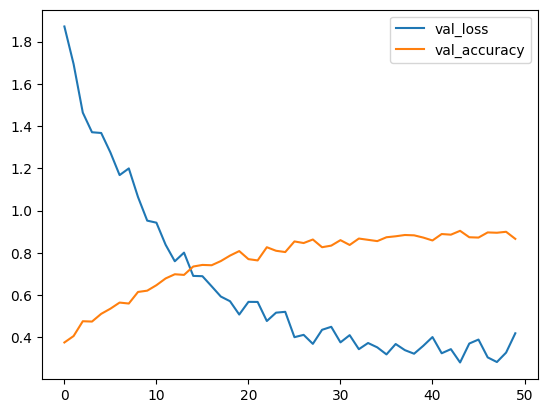

In [130]:
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

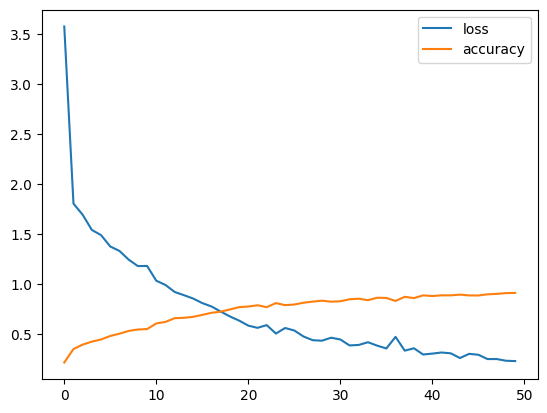

In [127]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

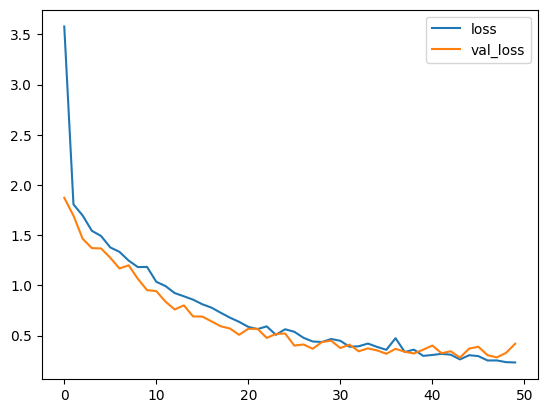

In [128]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

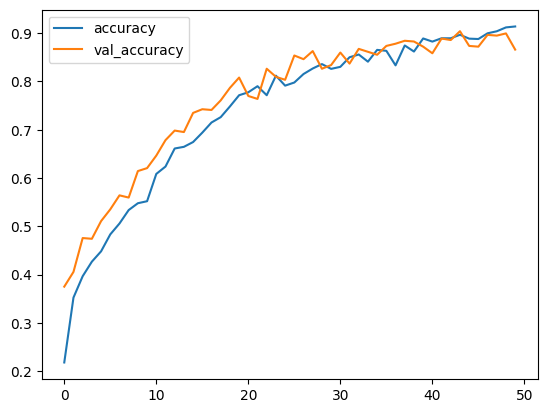

In [129]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

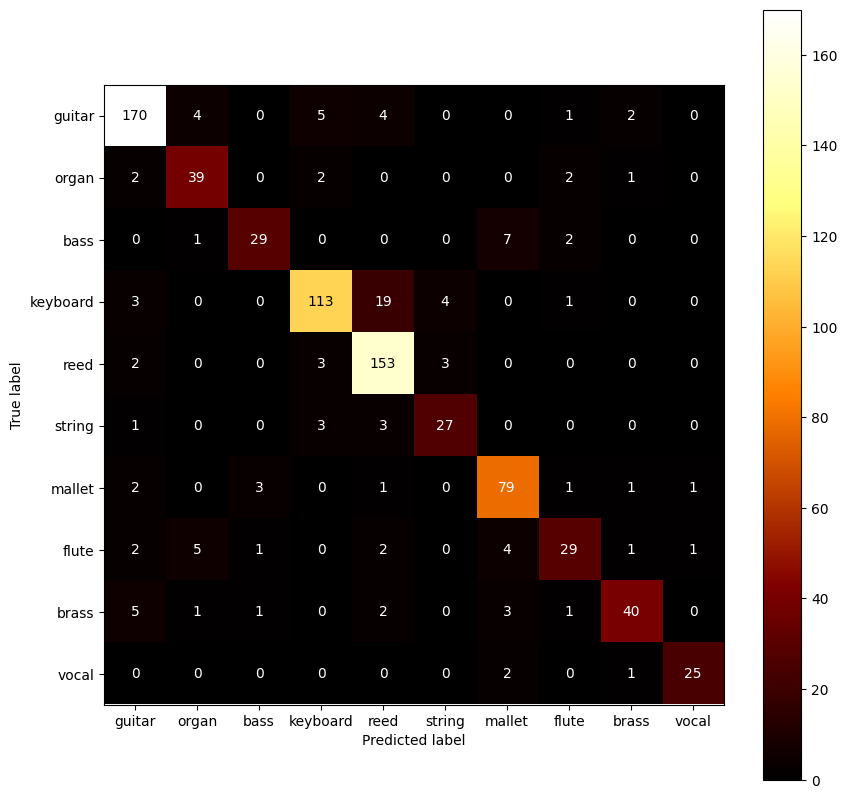

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
confusion_matrix1 = confusion_matrix(y_test, predicted_classes)

ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.show()

In [76]:
f1_score(y_test, predicted_classes, average='macro')

0.8337123695512109

In [77]:
accuracy_score(y_test, predicted_classes)

0.8585365853658536

In [78]:
precision_score(y_test, predicted_classes, average='macro')

0.8475350743045589

In [79]:
recall_score(y_test, predicted_classes, average='macro')

0.8246711229538748

# Grid search CV

In [80]:
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [81]:
def create_network(optimizer="rmsprop"):
    print("Creating network")
    model = models.Sequential([
        # Input layer
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

In [82]:
network=KerasClassifier(build_fn=create_network,verbose=1)
epochs=[30,50,60]
batches=[10,30,50]
optimizer=["rmsprop","adam"]


param_grid = dict(epochs=epochs,batch_size=batches,optimizer=optimizer)
grid = GridSearchCV(estimator=network, param_grid=param_grid, n_jobs=-1, cv = 3)

gpu = tf.config.list_physical_devices('GPU')
if gpu:
  try:
    with tf.device('/device:GPU:0'):
      print("Training on GPU")
      grid_result = grid.fit(x_train_reshaped, y_train_encoded)
  except RuntimeError as e:
    print(e)
else:
  print("Training on CPU")
  grid_result = grid.fit(x_train_reshaped, y_train_encoded)

Training on GPU


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Creating network
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.1735 - loss: 13.5272
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2660 - loss: 2.0595
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4144 - loss: 1.6293
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5437 - loss: 1.3263
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6376 - loss: 1.0447
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6789 - loss: 0.9189
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7560 - loss: 0.7368
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7738 - loss: 0.6387
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8312 - loss: 0.4930
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8552 - loss: 0.4197
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8760 - loss: 0.3732
Epoch 12/50
110/110 ━━━

In [83]:
grid_result.best_params_

{'batch_size': 30, 'epochs': 50, 'optimizer': 'rmsprop'}

In [84]:
grid_result.best_estimator_

KerasClassifier(
	model=None
	build_fn=<function create_network at 0x7b43a35ebeb0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [86]:
# Mean cross-validated score of the best_estimator
grid_result.best_score_

0.9328449328449328

In [89]:
print(grid_result.cv_results_)

{'mean_fit_time': array([ 83.50585286,  73.04085215, 117.00468111, 108.92437283,
       134.13737265, 129.91213981,  57.60602347,  57.52098123,
        81.49974839,  84.49069961, 102.93400908,  96.76621771,
        54.14923278,  47.31269066,  86.30591408,  74.31753333,
        93.0385112 , 100.55675904]), 'std_fit_time': array([ 6.93966446,  1.20173298,  5.24326792,  5.04609729,  3.389858  ,
        6.66719381,  7.27466723, 13.84331524,  3.99750303,  1.51908473,
       14.10652133,  7.29981628, 10.22745664,  4.74253506,  7.61306731,
        1.76608279,  8.20278322, 13.40429558]), 'mean_score_time': array([2.20223339, 1.60952942, 2.75349474, 1.42998616, 1.52472448,
       1.74947826, 2.65979441, 1.73971725, 1.65432596, 1.30266078,
       1.80357472, 1.5926768 , 4.1038607 , 1.16646433, 2.55848503,
       1.35130692, 1.08425522, 2.0820454 ]), 'std_score_time': array([0.96834347, 0.096523  , 0.63704033, 0.15609941, 0.00754073,
       0.79827086, 0.34811762, 0.79598728, 1.09890004, 0.309038

In [90]:
best_grid_model = grid_result.best_estimator_.model_
best_grid_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,702 (18.22 MB)

 Trainable params: 2,387,850 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,387,852 (9.11 MB)

In [91]:
predictions  = best_grid_model.predict(x_test_reshaped)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [92]:
loss, accuracy = best_grid_model.evaluate(x_test_reshaped, y_test_encoded)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9796 - loss: 0.4788
Test Loss: 0.4919234812259674
Test Accuracy: 0.964634120464325


In [93]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([4, 1, 3, 8, 0, 1, 0, 8, 6, 3, 4, 6, 3, 9, 9, 2, 7, 0, 0, 0, 6, 1,
       6, 4, 7, 0, 8, 6, 0, 8, 6, 6, 3, 5, 9, 4, 1, 4, 4, 1, 0, 4, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 2, 9, 0, 4, 0, 6, 0,
       0, 3, 3, 0, 0, 3, 0, 6, 3, 0, 1, 1, 2, 3, 4, 0, 6, 5, 0, 0, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 2, 4, 6, 4, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 1, 3, 0, 7, 3, 4, 4, 8, 7, 1, 0, 2, 0, 4, 9, 8, 8,
       3, 4, 0, 0, 4, 7, 3, 0, 2, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 6, 3,
       3, 4, 3, 0, 4, 0, 3, 2, 4, 4, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 4, 4, 4, 6, 4, 6, 4, 6, 7, 4, 2, 4, 0,
       1, 4, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 4,
       0, 3, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 3, 7, 7, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 1, 6, 0, 0, 1, 4, 4, 3, 7, 4,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [94]:
best_grid_model.save("/content/grid_model-loss0.94-acc0.96.keras")

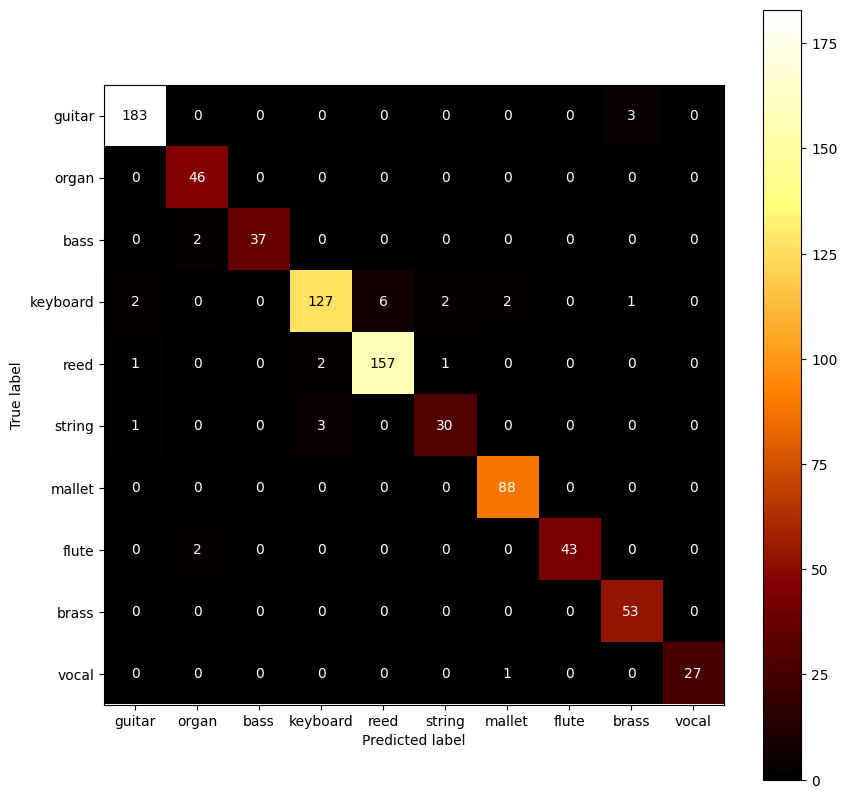

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix1 = confusion_matrix(y_test, predicted_classes)

ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.show()

In [96]:
f1_score(y_test, predicted_classes, average='macro')

0.961770000395904

In [97]:
accuracy_score(y_test, predicted_classes)

0.9646341463414634

In [98]:
precision_score(y_test, predicted_classes, average='macro')

0.9629869459366127

In [99]:
recall_score(y_test, predicted_classes, average='macro')

0.9617081264123586

# Re-train for traning history

In [108]:
re_model = models.Sequential([
        # Input layer
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
re_model.compile(loss='categorical_crossentropy', optimizer=grid_result.best_params_['optimizer'], metrics=["accuracy"])

In [109]:
gpu = tf.config.list_physical_devices('GPU')
if gpu:
  try:
    with tf.device('/device:GPU:0'):
      print("Training on GPU")
      grid_history = re_model.fit(x_train_reshaped, y_train_encoded, epochs=grid_result.best_params_['epochs'],
                              batch_size=grid_result.best_params_['batch_size'], validation_split=0.2)
  except RuntimeError as e:
    print(e)
else:
  print("Training on CPU")
  grid_history = re_model.fit(x_train_reshaped, y_train_encoded, epochs=grid_result.best_params_['epochs'],
                              batch_size=grid_result.best_params_['batch_size'], validation_split=0.2)

Training on GPU
Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.1511 - loss: 12.0573 - val_accuracy: 0.1921 - val_loss: 2.2895
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2154 - loss: 2.2375 - val_accuracy: 0.2530 - val_loss: 2.2022
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2660 - loss: 1.9981 - val_accuracy: 0.3201 - val_loss: 1.9466
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3924 - loss: 1.7080 - val_accuracy: 0.4924 - val_loss: 1.3964
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4923 - loss: 1.4544 - val_accuracy: 0.5412 - val_loss: 1.2668
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5518 - loss: 1.3180 - val_accuracy: 0.5716 - val_loss: 1.1469
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6081 - loss: 1.0471 - val_accuracy: 0.5854 - val_loss: 1.0969
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6884 - loss: 0.9029 - val_acc

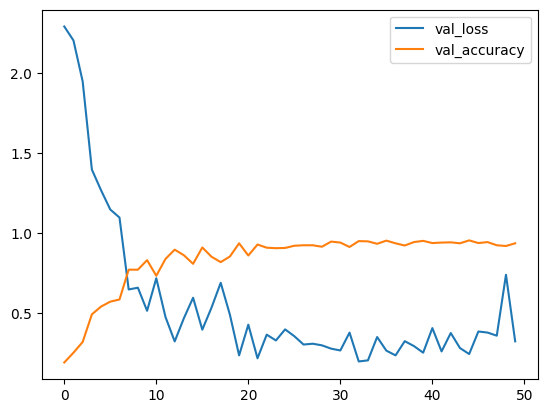

In [111]:
plt.plot(grid_history.history['val_loss'], label="val_loss")
plt.plot(grid_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

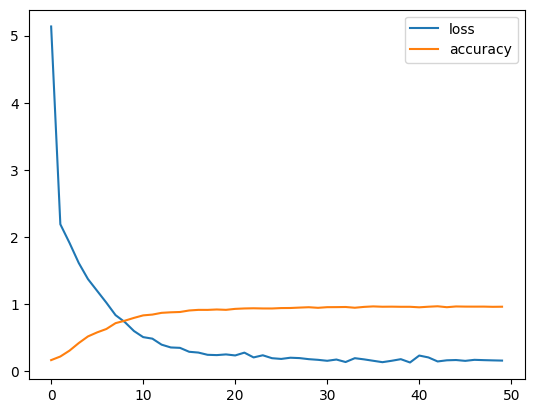

In [131]:
plt.plot(grid_history.history['loss'], label="loss")
plt.plot(grid_history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

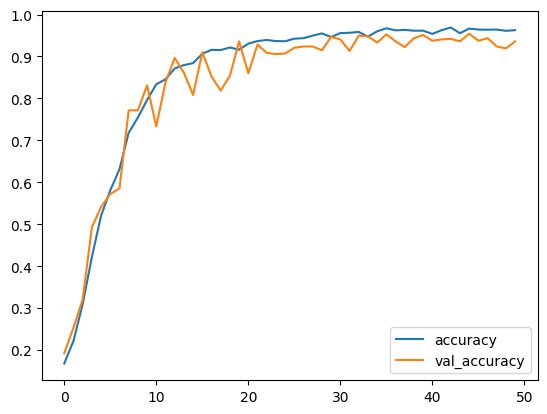

In [112]:
plt.plot(grid_history.history['accuracy'], label="accuracy")
plt.plot(grid_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

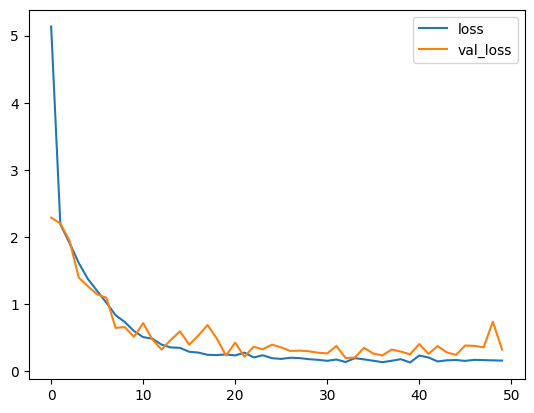

In [115]:
plt.plot(grid_history.history['loss'], label='loss')
plt.plot(grid_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()